In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("../data/raw/charging_sessions.csv")
df.shape[0]

66450

In [43]:
# add a new column "idle_time" to the dataframe. It shall hold the duration for which the EV was connected but done charging. calculation in = disconnectTime - doneChargingTime
df['doneChargingTime'] = pd.to_datetime(df['doneChargingTime'])
df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])
df['idle_time'] = df['disconnectTime'] - df['doneChargingTime']


In [44]:
# Create a new dataframe with rows where idle_time is negative
sessions_with_negative_idle_time = df[df['idle_time'] < pd.Timedelta(0)].copy()

# Add a new column "idle_time_in_minutes" in the new dataframe
sessions_with_negative_idle_time['idle_time_in_minutes'] = sessions_with_negative_idle_time['idle_time'].dt.total_seconds() / 60


In [34]:
#remove ids 5e7954b0f9af8b090600ec84 and 5c99728ff9af8b5022123831
#sessions_with_negative_idle_time = sessions_with_negative_idle_time[sessions_with_negative_idle_time['id'] != '5e7954b0f9af8b090600ec84']
#sessions_with_negative_idle_time = sessions_with_negative_idle_time[sessions_with_negative_idle_time['id'] != '5c99728ff9af8b5022123831']


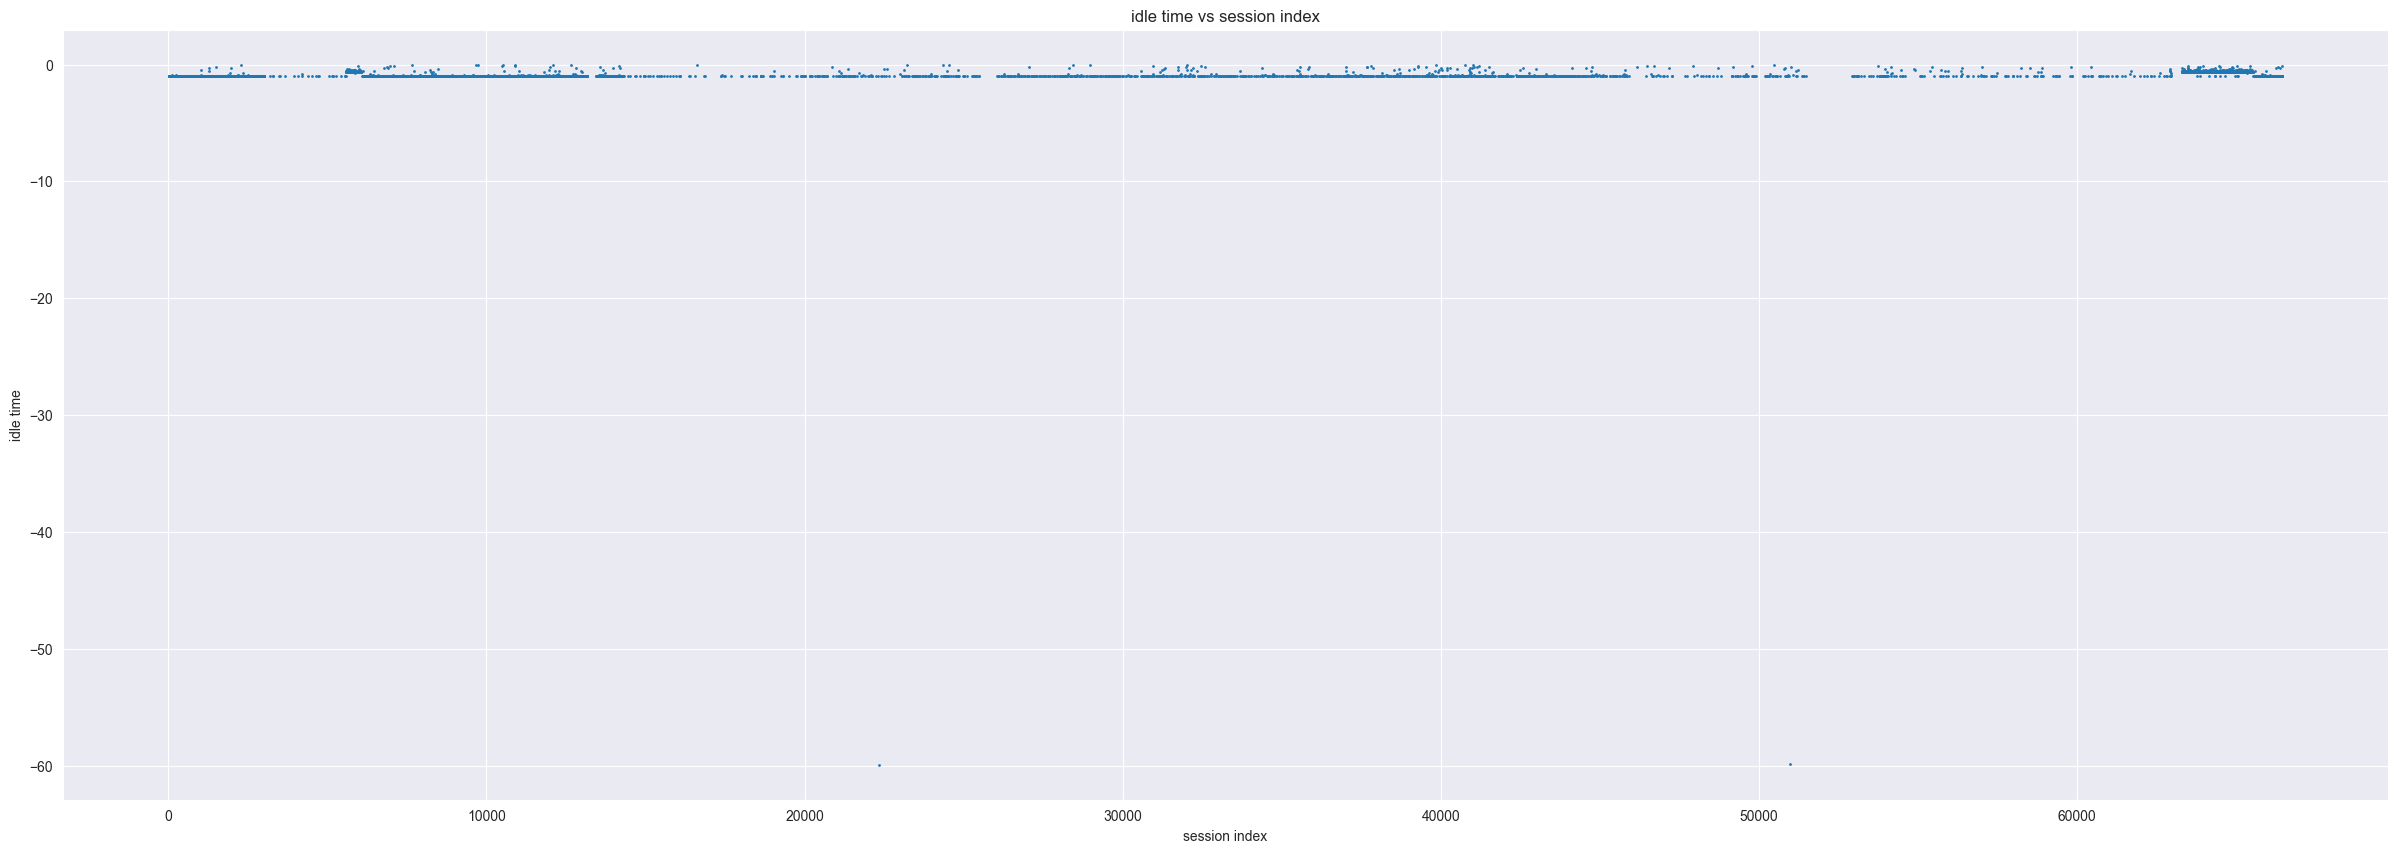

In [45]:
#plot idle_time vs session index
plt.figure(figsize=(30,10))
#type scatter plot
plt.scatter(sessions_with_negative_idle_time.index, sessions_with_negative_idle_time['idle_time_in_minutes'], s=1)
plt.xlabel('session index')
plt.ylabel('idle time')
plt.title('idle time vs session index')
plt.show()


In [36]:
sessions_with_negative_idle_time["idle_time_in_minutes"].describe()

count    4690.000000
mean       -0.901009
std         0.178570
min        -1.000000
25%        -0.983333
50%        -0.966667
75%        -0.950000
max        -0.016667
Name: idle_time_in_minutes, dtype: float64